# Oscilador armónico amortiguado

*René Mora Maya*

*09-06-17*

La ecuación para el oscilador armónico amortiguado con una fuerza de fricción que depende linealmente del módulo de la velocidad es 
$$ m\frac{d^2x}{dt^2}=-kx-\beta\frac{dx}{dt}$$
$$\Rightarrow \frac{d^2x}{dt^2}+\frac{\beta}{m}\frac{dx}{dt}+\frac{k}{m}x=0$$

Sea $\frac{\beta}{m}=2\gamma$ y $\frac{k}{m}=\omega^2$
$$\Rightarrow \boldsymbol{\ddot{x}}+2\gamma\boldsymbol{\dot{x}}+\omega^2\boldsymbol{x}=0$$

Existen 3 soluciones para la ecuación diferencial dependiendo de las constantes $k$, $m$ y $\gamma$.

**Caso 1.** Movimiento sobre-amortiguado $\gamma^2>\omega^2$ es decir $\beta^2>4km$.

La solución general viene dada por
$$x(t)=e^{-\gamma t}\left(Ae^{\alpha t}+Be^{-\alpha t}\right)$$ 
donde $\alpha=\sqrt{\gamma^2-\omega^2}$

**Caso 2.** Movimiento criticamente-amortiguado $\gamma^2=\omega^2$ es decir $\beta^2=4km$.

La solución general viene dada por
$$x(t)=e^{-\gamma t}\left(A+Bt\right)$$

**Caso 3.** Movimiento sub-amortiguado $\gamma^2<\omega^2$ es decir $\beta^2<4km$.

La solución general viene dada por
$$x(t)=Ce^{-\gamma t}\cos\left(\lambda t-\phi\right)$$
con $\lambda=\sqrt{\omega^2-\gamma^2}$

El problema tiene las condiciones iniciales $x(0)=1$ y $\dot{x}(0)=0$

In [1]:
include("Taylor0.jl")
using AT
f1(t,x,y)=y
f4(t,x,y)=-2*γ*y-ω²*x #Oscilador armónico amortiguado
using PyPlot

***Movimiento sobre-amortiguado $\gamma^2>\omega^2$***

$$x(t)=e^{-\gamma t}\left(Ae^{\alpha t}+Be^{-\alpha t}\right)
\hspace{1cm}\dot{x}(t)=\alpha e^{-\gamma t}\left(Ae^{\alpha t}-Be^{-\alpha t}\right)-\gamma e^{-\gamma t}\left(Ae^{\alpha t}+Be^{-\alpha t}\right)$$ 
$$x(t)=e^{-\gamma t}\left(Ae^{\alpha t}+Be^{-\alpha t}\right)
\hspace{1cm}\dot{x}(t)=Ae^{\left(\alpha-\gamma\right)t}\left(\alpha-\gamma\right)-
Be^{-\left(\alpha+\gamma\right)t}\left(\alpha+\gamma\right)$$ 

$$\begin{array}{l}
 A+B=1\\
 A\left(\alpha-\gamma\right)-B\left(\alpha+\gamma\right)=0
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
 B=1-A\\
 A\left(\alpha-\gamma+\alpha+\gamma\right)-\alpha-\gamma=0
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
 A=\frac{1}{2}+\frac{\gamma}{ 2\alpha}\\
 B=\frac{1}{2}-\frac{\gamma}{ 2\alpha}
\end{array}\hspace{.5cm}
$$

In [2]:
ω²=1.0 
γ=3.0
α=sqrt(γ^2-ω²)

2.8284271247461903

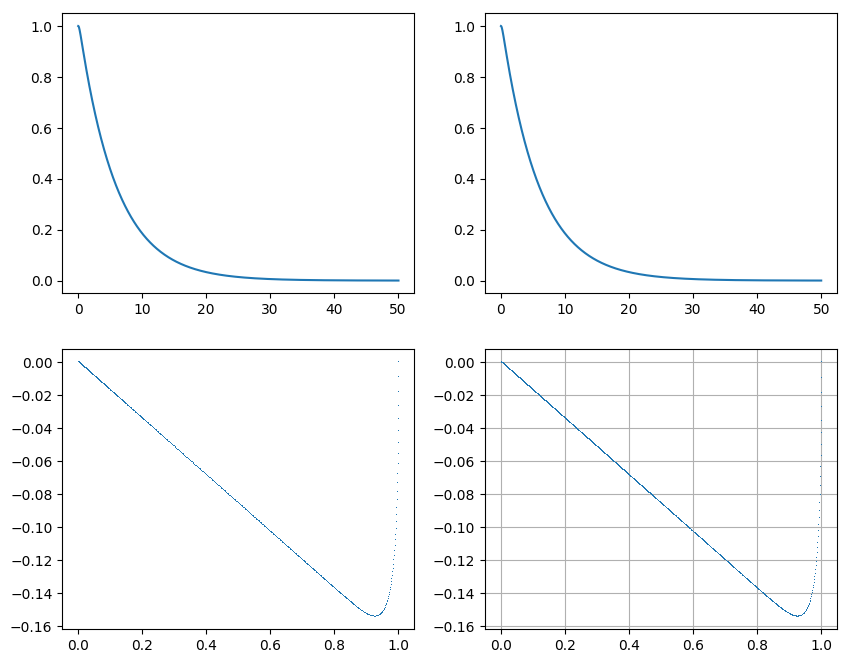

In [3]:
x0=1.0 #condición inicial x(0)=1
y0=0.0 #condición inicial der(x(0))=0
t0=0.0
tf=50.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
t1,x1,y1=metRungeKutta2(f1,f4,t0,tf,x0,y0,h)
t,x,y=integrador(f1,f4,x0,y0,t0,tf,ϵ,N)
fig = figure(figsize = (10, 8))
ax = subplot(221); bx = subplot(222)
ay = subplot(223); by = subplot(224)
ax[:plot](t, x); bx[:plot](t1, x1)
ay[:plot](x, y,label="E-fase",","); by[:plot](x1, y1,label="E-fase",",")
grid()

In [4]:
A=0.5+γ/(2*α)
B=0.5-γ/(2*α)
F1(t)=exp(-γ*t)*(A*exp(α*t)+B*exp(-α*t))
dF1(t)=A*exp((α-γ)*t)*(α-γ)-B*exp(-(α+γ)*t)*(α+γ)

dF1 (generic function with 1 method)

In [5]:
xan=F1.(t);yan=dF1.(t)
xan1=F1.(t1);yan1=dF1.(t1)
h

0.01

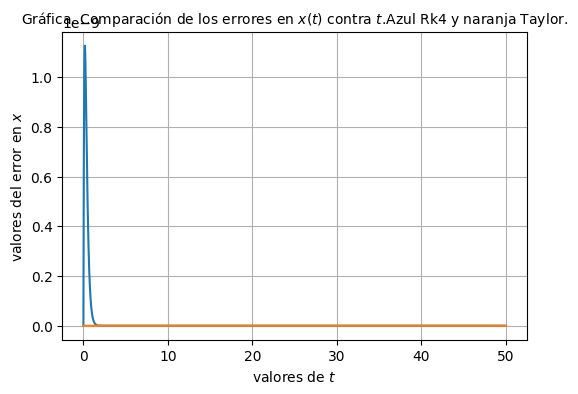

In [6]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,xan1-x1)
plot(t,xan-x)
title(L"Gráfica. Comparación de los errores en $x(t)$ contra $t$.Azul Rk4 y naranja Taylor.", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores del error en $x$")
grid()

***Movimiento criticamente-amortiguado $\gamma^2=\omega^2$***

$$x(t)=e^{-\gamma t}\left(A+Bt\right)\hspace{1cm}
\dot{x}(t)=B e^{-\gamma t}-\gamma e^{-\gamma t}\left(A+Bt\right)=
e^{-\gamma t}\left(B-\gamma A-\gamma Bt\right)=
e^{-\gamma t}\left(B\left(1-\gamma t\right)-\gamma A\right)$$

$$\begin{array}{l}
 A=1\\
 B-\gamma A=0
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
  A=1\\
 B=\gamma
\end{array}
$$

In [7]:
ω²=1.0 
γ=sqrt(ω²)

1.0

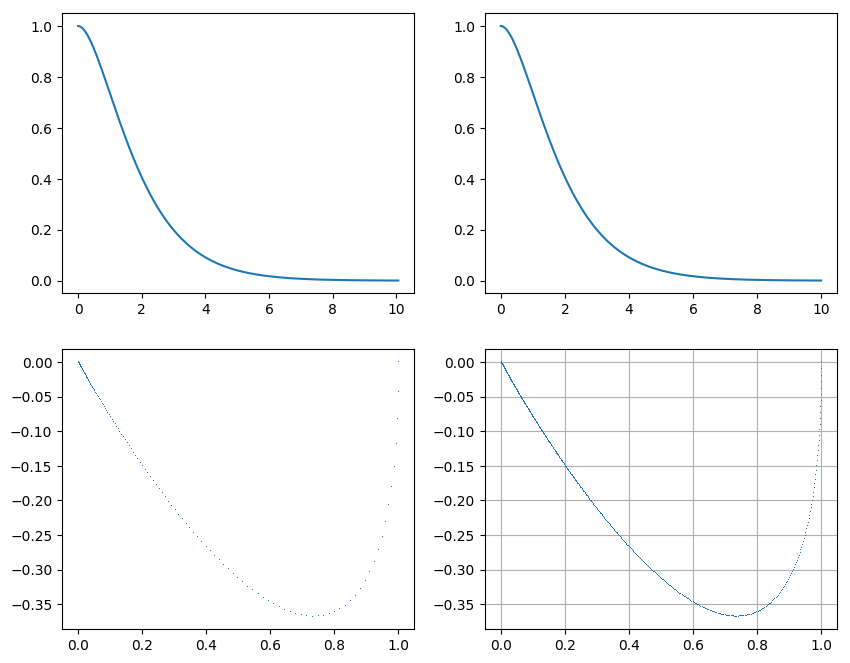

In [8]:
x0=1.0 #condición inicial x(0)=1
y0=0.0 #condición inicial der(x(0))=0
t0=0.0
tf=10.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
t1,x1,y1=metRungeKutta2(f1,f4,t0,tf,x0,y0,h)
t,x,y=integrador(f1,f4,x0,y0,t0,tf,ϵ,N)
fig = figure(figsize = (10, 8))
ax = subplot(221); bx = subplot(222)
ay = subplot(223); by = subplot(224)
ax[:plot](t, x); bx[:plot](t1, x1)
ay[:plot](x, y,label="E-fase",","); by[:plot](x1, y1,label="E-fase",",")
grid()

In [9]:
A=1.0
B=γ
F2(t)=exp(-γ*t)*(A+B*t)
dF2(t)=exp(-γ*t)*(B*(1-γ*t)-γ*A)

dF2 (generic function with 1 method)

In [10]:
xan=F2.(t);yan=dF2.(t)
xan1=F2.(t1);yan1=dF2.(t1)
h

0.01

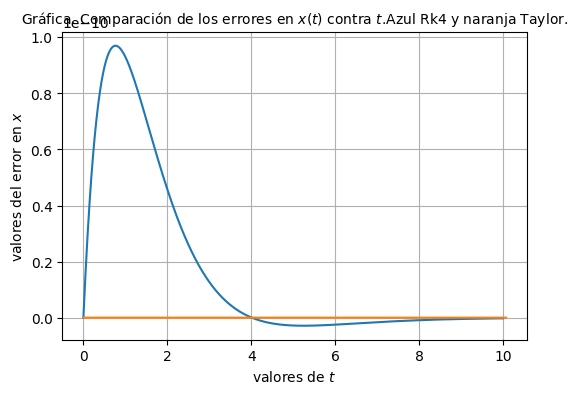

In [11]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,xan1-x1)
plot(t,xan-x)
title(L"Gráfica. Comparación de los errores en $x(t)$ contra $t$.Azul Rk4 y naranja Taylor.", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores del error en $x$")
grid()

***Movimiento sub-amortiguado $\gamma^2<\omega^2$***

$$x(t)=Ce^{-\gamma t}\cos\left(\lambda t-\phi\right)\hspace{1cm}\dot{x}(t)=-Ce^{-\gamma t}\left[\lambda \sin\left(\lambda t-\phi\right)+\gamma\cos\left(\lambda t-\phi\right)\right]$$

$$\begin{array}{l}
 C\cos\left(\phi\right)=1\\
 -C\left[-\lambda \sin\left(\phi\right)+\gamma\cos\left(\phi\right)\right]=0
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
 C\cos\left(\phi\right)=1\\
 \gamma\cos\left(\phi\right)=\lambda \sin\left(\phi\right)
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
 \tan\left(\phi\right)=\frac{\gamma}{\lambda}\\
 C\cos\left(\phi\right)=1
\end{array}\Rightarrow
\begin{array}{l}
 \phi=\arctan\left(\frac{\gamma}{\lambda}\right)\\
 C=\sqrt{1+\left(\frac{\gamma}{\lambda}\right)^2}
\end{array}
$$

In [12]:
ω²=64.0 
γ=0.5
λ=sqrt(ω²-γ^2)

7.984359711335656

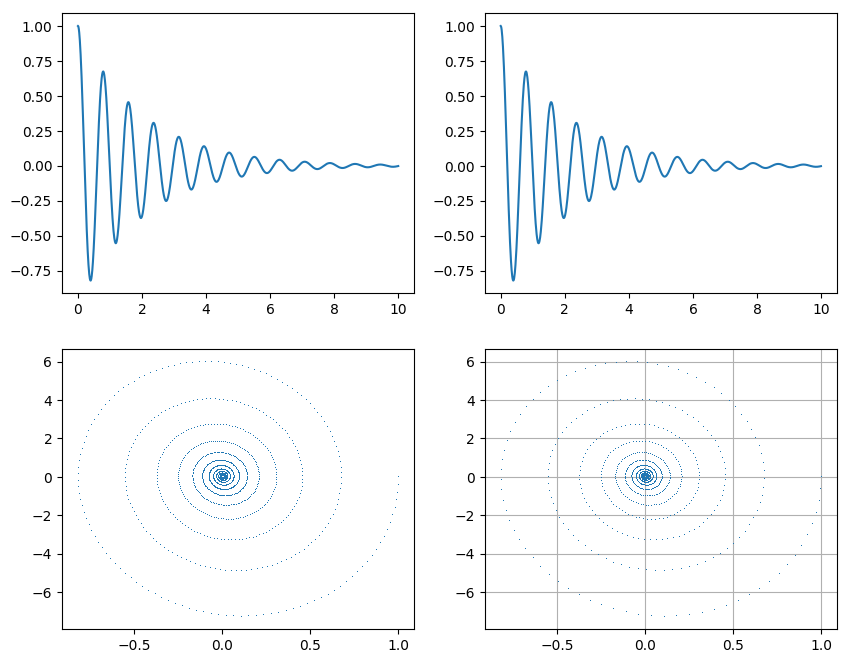

In [13]:
x0=1.0 #condición inicial x(0)=1
y0=0.0 #condición inicial der(x(0))=0
t0=0.0
tf=10.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
t1,x1,y1=metRungeKutta2(f1,f4,t0,tf,x0,y0,h)
t,x,y=integrador(f1,f4,x0,y0,t0,tf,ϵ,N)
fig = figure(figsize = (10, 8))
ax = subplot(221); bx = subplot(222)
ay = subplot(223); by = subplot(224)
ax[:plot](t, x); bx[:plot](t1, x1)
ay[:plot](x, y,label="E-fase",","); by[:plot](x1, y1,label="E-fase",",")
grid()

In [14]:
C=sqrt(1+(γ/λ)^2)
ϕ=atan(γ/λ)
F3(t)=C*exp(-γ*t)*cos(λ*t-ϕ)
dF3(t)=-C*exp(-γ*t)*(λ*sin(λ*t-ϕ)+γ*cos(λ*t-ϕ))

dF3 (generic function with 1 method)

In [15]:
xan=F3.(t);yan=dF3.(t)
xan1=F3.(t1);yan1=dF3.(t1)
h

0.01

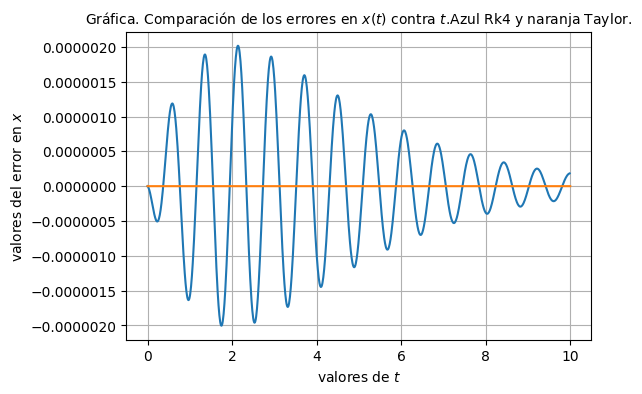

In [16]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,xan1-x1)
plot(t,xan-x)
title(L"Gráfica. Comparación de los errores en $x(t)$ contra $t$.Azul Rk4 y naranja Taylor.", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores del error en $x$")
grid()